## Разметка сессий

Есть столбцы id и date, создаем столбец маркера смены сессии, создаем столбец номера сессии

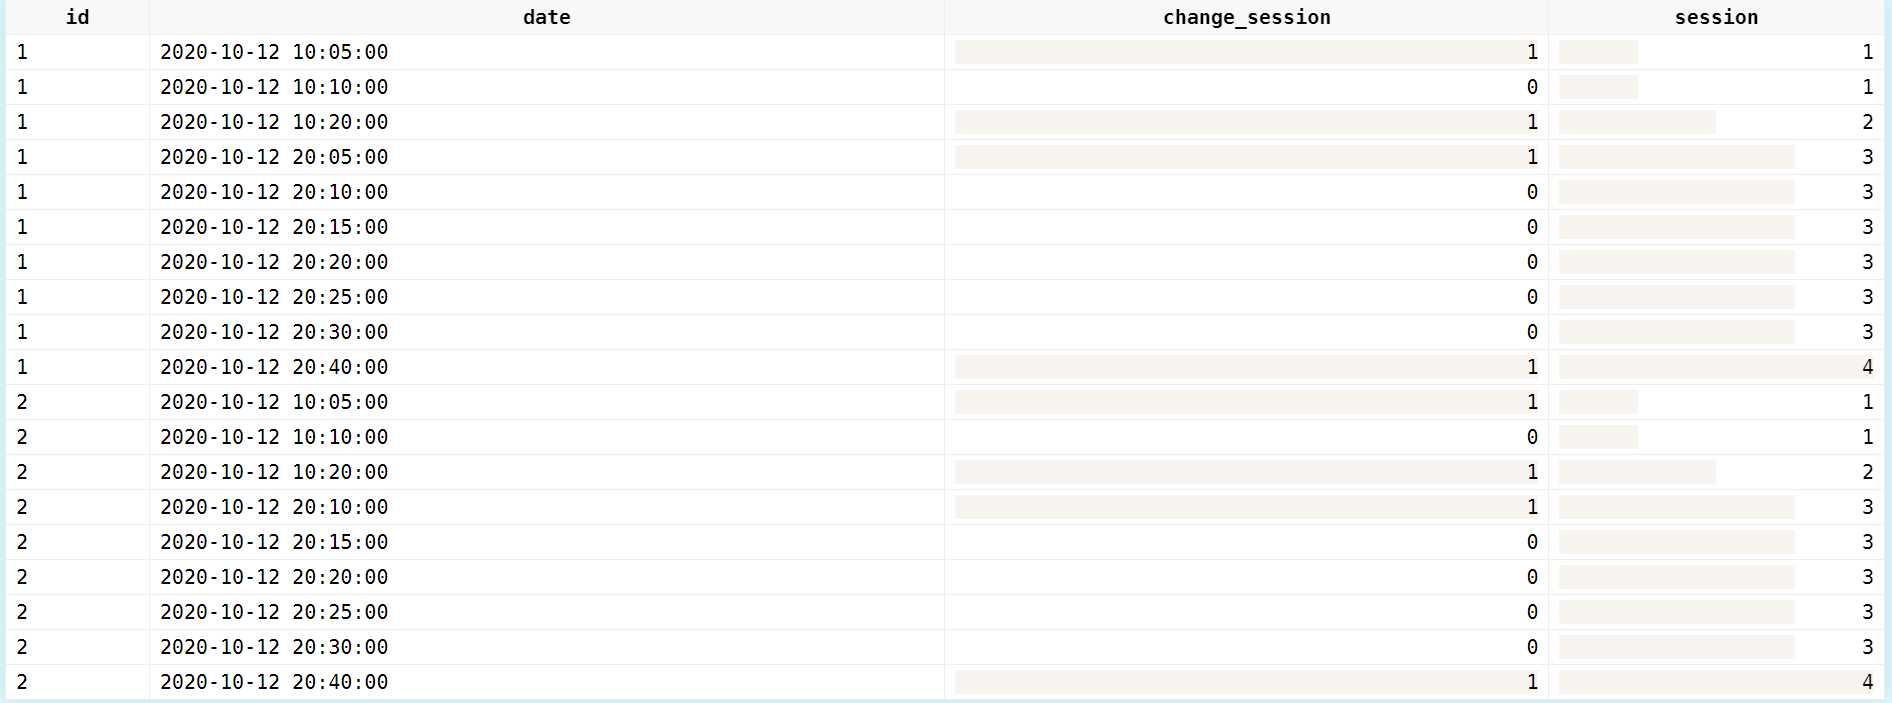

In [ ]:
select *,
sum(change_session) over (partition by id order by date) as session
from
(
    select id,
    date,
    if(date = (select min(date) from login_step), 1 , neighbor(date_diff('minute', date, neighbor(date, 1))>5, -1)) as change_session
    from 
    (
        -- сортируем, чтобы применить neighbor
        select * from login_step order by id, date
    )
)